# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.5 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 40.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080019 sha256=722cb0861d4446c76f664fa09785e993bb425eb21ff3e6ee8bc098de347166b9
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.3
    Uninstalling bokeh-2.4.3:
      Successfully uninstalled bokeh-2.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. 

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "obafemidolaposuccess"
kaggle_key = "977372879521bc618a0c06158c3c0f90"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 108MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.loc[:,'datetime'] = pd.to_datetime(train.loc[:,'datetime'])
train.head()

<ipython-input-9-46bd9616bca2>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:,'datetime'] = pd.to_datetime(train.loc[:,'datetime'])


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.loc[:,'datetime'] = pd.to_datetime(test.loc[:,'datetime'])
test.head()

<ipython-input-12-61005ca095d1>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.loc[:,'datetime'] = pd.to_datetime(test.loc[:,'datetime'])


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.loc[:,'datetime'] = pd.to_datetime(submission.loc[:,'datetime'])
submission.head()

<ipython-input-13-bf13b9ecf9d6>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  submission.loc[:,'datetime'] = pd.to_datetime(submission.loc[:,'datetime'])


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
train.drop(["casual","registered"],axis=1,inplace=True)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [ ]:
predictor = TabularPredictor(label='count',
                             eval_metric='root_mean_squared_error').fit(train_data=train, 
                                                                                      time_limit=600, 
                                                                                      presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230609_014304/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230609_014304/"
AutoGluon Version:  0.7.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.003119      28.149146  545.470895                0.001344           0.350987            3       True         13
1   RandomForestMSE_BAG_L2  -53.265263      19.535217  437.914366                0.660720          41.793426            2       True         12
2          LightGBM_BAG_L2  -55.069941      19.482517  429.557881                0.608020          33.436941            2       True         11
3        LightGBMXT_BAG_L2  -60.412202      26.879062  469.889541                8.004565          73.768601            2       True         10
4    KNeighborsDist_BAG_L1  -84.125061       0.044609    0.032033                0.044609           0.032033            1       True          2
5      WeightedEnsemble_L2  -84.125061       0.045725    1.129056         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.6875660685852,

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0    22.596952
1    42.228233
2    45.757530
3    48.427948
4    51.147812
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.588463
std        89.750450
min         3.094798
25%        20.504528
50%        63.795971
75%       165.988495
max       366.753143
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
(predictions<0).sum().sum()

0

In [ ]:
# Set them to zero


### Set predictions to submission dataframe, save, and submit

In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.loc[:,'datetime'] = pd.to_datetime(submission.loc[:,'datetime'])
submission.head()

<ipython-input-20-bf13b9ecf9d6>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  submission.loc[:,'datetime'] = pd.to_datetime(submission.loc[:,'datetime'])


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
submission["count"] = predictions[0]
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 190k/190k [00:03<00:00, 64.2kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission.csv               2023-06-09 01:54:56  first raw submission                 complete  1.98037      1.98037       
submission_new_hpo3.csv      2023-06-09 00:39:03  new features with hyperparameters 3  complete  2.04881      2.04881       
submission_new_hpo2.csv      2023-06-09 00:29:31  new features with hyperparameters 2  complete  2.15834      2.15834       
submission_new_hpo1.csv      2023-06-09 00:20:13  new features with hyperparameters 1  complete  3.62456      3.62456       


#### Initial score of `1.93717`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [ ]:
# sets matplotlib to inline and displays graphs below the corressponding cell.
import matplotlib.pyplot as plt
%matplotlib inline  

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'count'}>, <Axes: >, <Axes: >]],
      dtype=object)

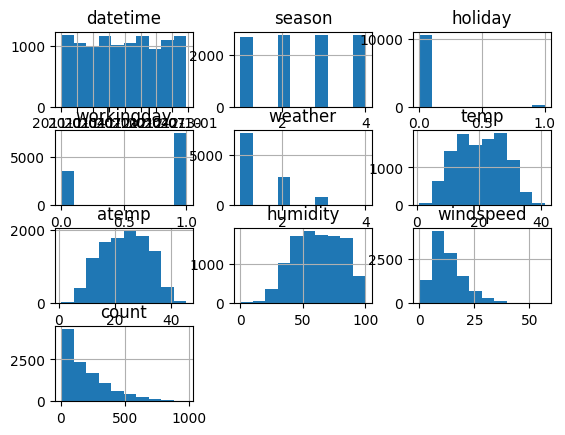

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [ ]:
train["hour"] = [t.hour for t in pd.DatetimeIndex(train.datetime)]
train["day"] = [t.dayofweek for t in pd.DatetimeIndex(train.datetime)]
train["month"] = [t.month for t in pd.DatetimeIndex(train.datetime)]
train['year'] = [t.year for t in pd.DatetimeIndex(train.datetime)]
train['year'] = train['year'].map({2011:0, 2012:1})
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,5,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,5,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,5,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,5,1,0


In [ ]:
test["hour"] = [t.hour for t in pd.DatetimeIndex(test.datetime)]
test["day"] = [t.dayofweek for t in pd.DatetimeIndex(test.datetime)]
test["month"] = [t.month for t in pd.DatetimeIndex(test.datetime)]
test['year'] = [t.year for t in pd.DatetimeIndex(test.datetime)]
test['year'] = test['year'].map({2011:0, 2012:1})
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,3,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,3,1,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,3,1,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,3,1,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,3,1,0


### NOW LET'S SEE THE HOUR FEATURE AS IT VARIES WITH DIIFFERENT FEATURES

In [ ]:
# importing seaborn
import seaborn as sns

<Axes: xlabel='hour', ylabel='count'>

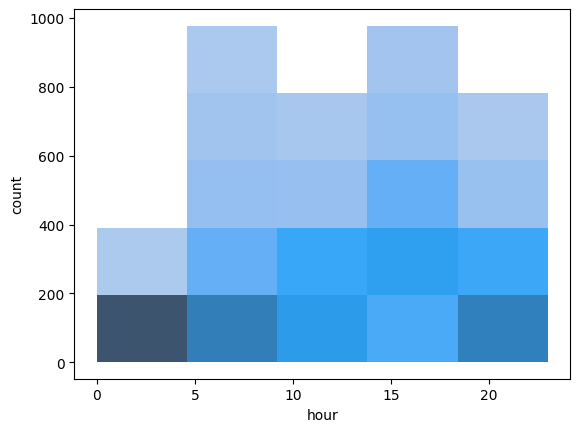

In [ ]:
# View histogram of all features again now with the hour feature
# With Count
sns.histplot(data=train,x="hour",y="count",bins=5)

<function matplotlib.pyplot.show(close=None, block=None)>

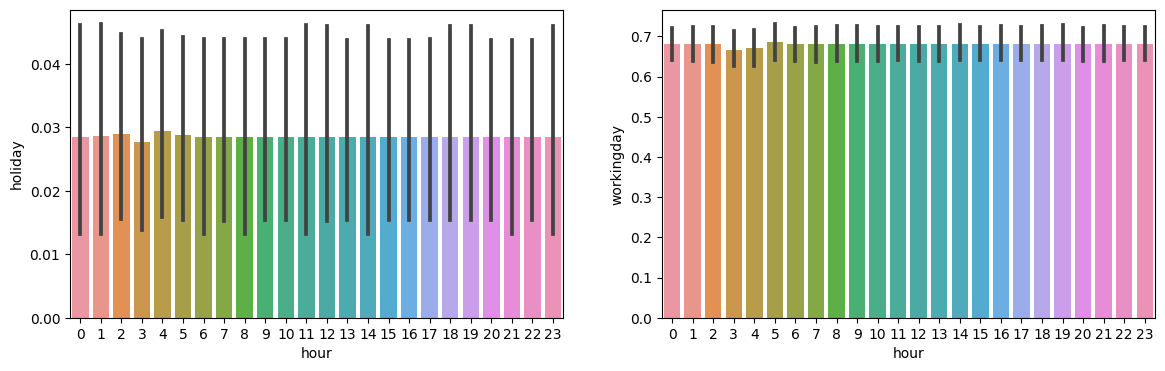

In [ ]:
# Establish the figure
plt.figure(figsize=[14,4])

# Using  holiday and workingday against hour

# For Holiday against hour
plt.subplot(1,2,1)
sns.barplot(data=train,x="hour",y="holiday")

# For workingday against hour
plt.subplot(1,2,2)
sns.barplot(data=train,x="hour",y="workingday")

plt.show

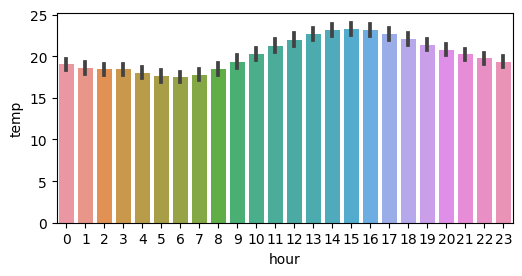

In [ ]:
# Establish the figure
plt.figure(figsize=[20,6])

# Using temp against hour

#For temp against temp
plt.subplot(2,3,1)
sns.barplot(data=train,x="hour",y="temp")

plt.show()

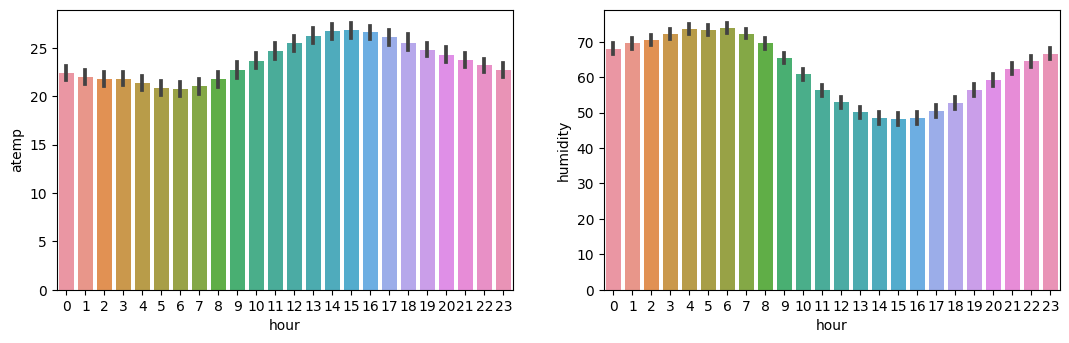

In [ ]:
# Establish the figure
plt.figure(figsize=[20,8])

# Using atemp and humidity against hour

plt.subplot(2,3,1)
sns.barplot(data=train,x="hour",y="atemp")

plt.subplot(2,3,2)
sns.barplot(data=train,x="hour",y="humidity")

plt.show()


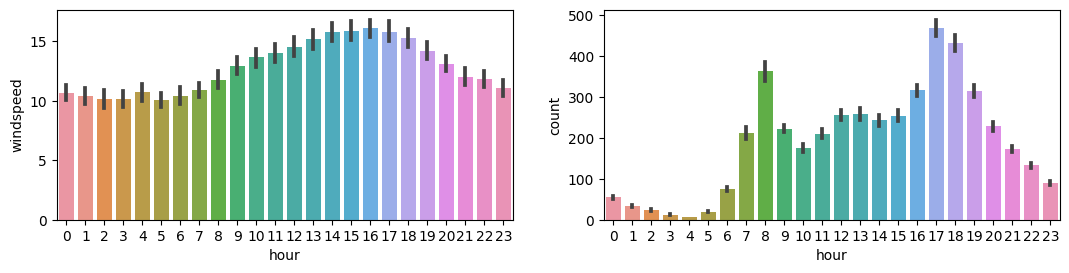

In [ ]:
# Establish the figure
plt.figure(figsize=[20,6])

# Using windspeed and count against hour

plt.subplot(2,3,2)
sns.barplot(data=train,x="hour",y="windspeed")

plt.subplot(2,3,3)
sns.barplot(data=train,x="hour",y="count")

plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
# Using feature engineering to separate season as per values for the train data set
season = pd.get_dummies(train['season'],prefix='season')
train = pd.concat([train, season],axis=1)
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,5,1,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,5,1,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,5,1,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,5,1,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,5,1,0,1,0,0,0


In [ ]:
# Using feature engineering to separate season as per values for the test data set
season = pd.get_dummies(test['season'],prefix='season')
test = pd.concat([test, season],axis=1)
test.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,3,1,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,3,1,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,3,1,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,3,1,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,3,1,0,1,0,0,0


In [ ]:
# Using feature engineering to separate weather as per values for the train data set
weather = pd.get_dummies(train['weather'],prefix='weather')
train = pd.concat([train, weather],axis=1)
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,...,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,...,1,0,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,...,1,0,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,...,1,0,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,...,1,0,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,...,1,0,1,0,0,0,1,0,0,0


In [ ]:
# Using feature engineering to separate seasson as per values for the train data set
weather = pd.get_dummies(test['weather'],prefix='weather')
test = pd.concat([test, weather],axis=1)
test.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,...,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,...,1,0,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,...,1,0,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,...,1,0,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,...,1,0,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,...,1,0,1,0,0,0,1,0,0,0


In [ ]:
# Dropping the weather and season column in the train and test dataset
train.drop(['season','weather'], inplace=True, axis=1)
test.drop(['season','weather'], inplace=True, axis=1)
test.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,hour,day,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,0,3,1,0,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,3,1,0,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,2,3,1,0,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,3,3,1,0,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,4,3,1,0,1,0,0,0,1,0,0,0


In [ ]:
train.drop(['datetime'], inplace=True, axis=1)
test.drop(['datetime'], inplace=True, axis=1)
test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,hour,day,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,1,10.66,11.365,56,26.0027,0,3,1,0,1,0,0,0,1,0,0,0
1,0,1,10.66,13.635,56,0.0000,1,3,1,0,1,0,0,0,1,0,0,0
2,0,1,10.66,13.635,56,0.0000,2,3,1,0,1,0,0,0,1,0,0,0
3,0,1,10.66,12.880,56,11.0014,3,3,1,0,1,0,0,0,1,0,0,0
4,0,1,10.66,12.880,56,11.0014,4,3,1,0,1,0,0,0,1,0,0,0


In [ ]:
predictor_new_features = TabularPredictor(label='count',eval_metric='root_mean_squared_error').fit(train_data=train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230609_015648/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230609_015648/"
AutoGluon Version:  0.7.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 18
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -33.927470      26.891176  505.945488                0.001280           0.921368            3       True         14
1      WeightedEnsemble_L2  -33.986790      24.250834  367.762162                0.000896           0.435829            2       True          8
2     ExtraTreesMSE_BAG_L2  -34.186165      25.710335  382.666369                0.967592          15.227264            2       True         13
3          CatBoost_BAG_L2  -34.269895      24.799067  411.682105                0.056324          44.243000            2       True         12
4          LightGBM_BAG_L2  -34.677795      25.027240  398.012298                0.284497          30.573194            2       True         10
5   RandomForestMSE_BAG_L2  -34.769811      25.414774  412.092948         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -115.73323148534313,
  'KNeighborsDist_BAG_L1': -112.15711242835349,
  'LightGBMXT_BAG_L1': -36.70938924841034,
  'LightGBM_BAG_L1': -35.728342789582605,
  'RandomForestMSE_BAG_L1': -39.61493395297692,


In [ ]:
predictions_new = predictor_new_features.predict(test)
predictions_new.head()

0    12.445139
1     6.246857
2     4.396225
3     4.077190
4     3.916755
Name: count, dtype: float32

In [ ]:
# Checking for the total amount of results less than 0
(predictions_new<0).sum()

0

In [ ]:
#predictions_new[predictions_new<0] =0
#(predictions_new<0).sum()

In [ ]:
# Same thing as train and test dataset
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features.loc[:,'datetime'] = pd.to_datetime(submission_new_features.loc[:,'datetime'])
submission_new_features.head()

<ipython-input-45-e275f52d214e>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  submission_new_features.loc[:,'datetime'] = pd.to_datetime(submission_new_features.loc[:,'datetime'])


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions for new features
submission_new_features["count"] = predictions_new[0]
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 190k/190k [00:03<00:00, 50.0kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-06-09 02:08:39  new features                         complete  2.40774      2.40774       
submission.csv               2023-06-09 01:54:56  first raw submission                 complete  1.98037      1.98037       
submission_new_hpo3.csv      2023-06-09 00:39:03  new features with hyperparameters 3  complete  2.04881      2.04881       
submission_new_hpo2.csv      2023-06-09 00:29:31  new features with hyperparameters 2  complete  2.15834      2.15834       


#### New Score of `2.13390`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
#hpo1   hyperparameter="NN", hyperparameter_tune_kwargs="auto"
predictor_new_hpo1 = TabularPredictor(label="count",eval_metric="root_mean_squared_error").fit(train_data=train,
                                                                      time_limit=600,
                                                                        hyperparameters={'NN_TORCH': {'num_epochs': 10,
                                                                                        'activation': 'relu', 
                                                                                        'dropout_prob': 0.5}},
                                                                        hyperparameter_tune_kwargs='auto',
                                                                         presets="best_quality")

Fitted model: NeuralNetTorch_BAG_L2/8f858cd2 ...
	-105.6112	 = Validation score   (-root_mean_squared_error)
	55.04s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L2/c08d7887 ...
	-263.6493	 = Validation score   (-root_mean_squared_error)
	141.14s	 = Training   runtime
	0.0s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 21.05s of remaining time.
	-105.6112	 = Validation score   (-root_mean_squared_error)
	0.28s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 579.27s ... Best model: "WeightedEnsemble_L3"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230609_020858/")


In [ ]:
predictor_new_hpo1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                            model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetTorch_BAG_L2/8f858cd2 -105.611199       0.000908  299.417642                0.000520          55.043427            2       True          4
1             WeightedEnsemble_L3 -105.611199       0.001985  299.697463                0.001077           0.279820            3       True          6
2             WeightedEnsemble_L2 -115.306082       0.001509  244.648797                0.001121           0.274582            2       True          3
3  NeuralNetTorch_BAG_L1/eb516f79 -115.511481       0.000224   55.457099                0.000224          55.457099            1       True          1
4  NeuralNetTorch_BAG_L1/d32f5abd -174.973620       0.000165  188.917116                0.000165         188.917116            1       True          2
5  NeuralNetTorch_BAG_L2/c08d788

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'NeuralNetTorch_BAG_L1/eb516f79': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L1/d32f5abd': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'NeuralNetTorch_BAG_L2/8f858cd2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L2/c08d7887': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'NeuralNetTorch_BAG_L1/eb516f79': -115.51148117444747,
  'NeuralNetTorch_BAG_L1/d32f5abd': -174.97362016333557,
  'WeightedEnsemble_L2': -115.30608220509987,
  'NeuralNetTorch_BAG_L2/8f858cd2': -105.61119885874238,
  'NeuralNetTorch_BAG_L2/c08d7887': -263.6492876991352,
  'WeightedEnsemble_L3': -105.61119885874238},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'NeuralNetTorch_BAG_L1/eb516f79': '/content/AutogluonModels/ag-20230609_020858/models/NeuralNetTorch_BAG_L1/eb516f79/',
  'NeuralNetTorch_BAG_L1/d32f5abd': '/co

In [ ]:
# Remember to set all negative values to zero for "Hpo 1"
predictions_new_hpo1 = predictor_new_hpo1.predict(test)

In [ ]:
#Sum of all negative values in "HPO 1"
(predictions_new_hpo1<0).sum()

0

In [ ]:
# Same thing as train and test dataset for "HPO 1"
submission_new_hpo1 = pd.read_csv('sampleSubmission.csv')
submission_new_hpo1.loc[:,'datetime'] = pd.to_datetime(submission_new_hpo1.loc[:,'datetime'])
submission_new_hpo1.head()

<ipython-input-53-a906b836c43d>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  submission_new_hpo1.loc[:,'datetime'] = pd.to_datetime(submission_new_hpo1.loc[:,'datetime'])


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions for "HPO 1"
submission_new_hpo1["count"] = predictions_new_hpo1[0]
submission_new_hpo1.to_csv("submission_new_hpo1.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo1.csv -m "new features with hyperparameters 1"

100% 184k/184k [00:05<00:00, 34.1kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo1.csv      2023-06-09 02:37:41  new features with hyperparameters 1  complete  2.73104      2.73104       
submission_new_features.csv  2023-06-09 02:08:39  new features                         complete  2.40774      2.40774       
submission.csv               2023-06-09 01:54:56  first raw submission                 complete  1.98037      1.98037       
submission_new_hpo3.csv      2023-06-09 00:39:03  new features with hyperparameters 3  complete  2.04881      2.04881       


#### New Score of `2.61635`

## Hyper parameter optimization 2

In [ ]:
#hpo2   hyperparameter='GBM', hyperparameter_tune_kwargs="random"
predictor_new_hpo2 = TabularPredictor(label="count",eval_metric="root_mean_squared_error").fit(train_data=train,
                                                                      time_limit=600,
                                                                        hyperparameters={'GBM': {'num_boost_round': 1000, 
                                                                                                 'learning_rate': 0.01}},
                                                                        hyperparameter_tune_kwargs='random',
                                                                         presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230609_053636/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230609_053636/"
AutoGluon Version:  0.7.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 18
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [ ]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -36.993393       0.001868  166.944725                0.001301           0.535447            2       True          7
1   WeightedEnsemble_L3 -37.229359       0.004701  470.023262                0.001063           0.555609            3       True         12
2    LightGBM_BAG_L1/T2 -37.288189       0.000178   60.264202                0.000178          60.264202            1       True          2
3    LightGBM_BAG_L2/T3 -37.294717       0.003211  359.314407                0.002084          46.094571            2       True         10
4    LightGBM_BAG_L1/T6 -37.437847       0.000173   54.527656                0.000173          54.527656            1       True          6
5    LightGBM_BAG_L2/T1 -37.446242       0.001319  362.204519                0.000193          48.

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T6': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -38.84638910640673,
  'LightGBM_BAG_L1/T2': -37.28818856815185,
  'LightGBM_BAG_L1/T3': -39.35211602639841,
  'LightGBM_BAG_L1/T4': -37.62997353227351,
  'LightGBM_BAG_L1/T5': -39.31505459823495,
  'LightGBM_BAG_L1/T6': -37.43784663733534,
  'WeightedEnsemble_L2': -36.99339322890647,
  'LightGBM_BAG_L2/T1': -37.446242

In [ ]:
# Remember to set all negative values to zero for "Hpo 2"
predictions_new_hpo2 = predictor_new_hpo2.predict(test)

In [ ]:
#Sum of all negative values in "HPO 2"
predictions_new_hpo2[predictions_new_hpo2<0] =0
(predictions_new_hpo2<0).sum()

In [ ]:
# Same thing as train and test dataset for "HPO 2"
submission_new_hpo2 = pd.read_csv('sampleSubmission.csv')
submission_new_hpo2.loc[:,'datetime'] = pd.to_datetime(submission_new_hpo2.loc[:,'datetime'])
submission_new_hpo2.head()

In [ ]:
# Same submitting predictions for "HPO 2"
submission_new_hpo2["count"] = predictions_new_hpo2[0]
submission_new_hpo2.to_csv("submission_new_hpo2.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo2.csv -m "new features with hyperparameters 2"

100% 190k/190k [00:02<00:00, 69.6kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo2.csv      2023-06-09 05:45:57  new features with hyperparameters 2  complete  2.12980      2.12980       
submission_new_hpo3.csv      2023-06-09 03:00:14  new features with hyperparameters 3  complete  2.04881      2.04881       
submission_new_hpo2.csv      2023-06-09 02:47:57  new features with hyperparameters 2  complete  2.12980      2.12980       
submission_new_hpo1.csv      2023-06-09 02:37:41  new features with hyperparameters 1  complete  2.73104      2.73104       


#### New Score of `2.12980`

## Hyper parameter optimization 3

In [ ]:
#hpo3   hyperparameter='XGB', hyperparameter_tune_kwargs="auto"
predictor_new_hpo3 = TabularPredictor(label="count",problem_type='regression',eval_metric="root_mean_squared_error").fit(train_data=train,
                                                                      time_limit=600,
                                                                        hyperparameters={'XGB': {'n_estimators': 10000, 
                                                                                                 'learning_rate': 0.0001}},
                                                                        hyperparameter_tune_kwargs= 'random',
                                                                        presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230609_091106/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230609_091106/"
AutoGluon Version:  0.7.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 24
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10473.47 MB
	Train Data (Original)  Memory Usage: 0.72 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			No

In [ ]:

predictor_new_hpo3.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    XGBoost_BAG_L1/T1 -148.671666       0.000187  340.632026                0.000187         340.632026            1       True          1
1  WeightedEnsemble_L2 -148.671666       0.001121  340.637076                0.000934           0.005050            2       True          2
2    XGBoost_BAG_L2/T1 -177.513680       0.000402  568.310241                0.000215         227.678215            2       True          3
3  WeightedEnsemble_L3 -177.513680       0.001986  568.317077                0.001584           0.006836            3       True          4
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_XGBoost', 'WeightedEnsembleModel'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: True  (with 3 levels)
Feature Metadata (Processed):
(raw 

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'XGBoost_BAG_L1/T1': -148.6716655037568,
  'WeightedEnsemble_L2': -148.6716655037568,
  'XGBoost_BAG_L2/T1': -177.5136803250387,
  'WeightedEnsemble_L3': -177.5136803250387},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'XGBoost_BAG_L1/T1': '/content/AutogluonModels/ag-20230609_091106/models/XGBoost_BAG_L1/T1/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20230609_091106/models/WeightedEnsemble_L2/',
  'XGBoost_BAG_L2/T1': '/content/AutogluonModels/ag-20230609_091106/models/XGBoost_BAG_L2/T1/',
  'WeightedEnsemble_L3': 'AutogluonModels/ag-20230609_091106/models/WeightedEnsemble_L3/'},
 'model_fit_times': {'XGBoost_BAG_L1/T1': 340.6320261955261,
  'WeightedEnsemble_L2': 0.005050182342529297,
  'XGBoost_BAG_L2/T1': 227.6782147884369

In [ ]:
# Remember to set all negative values to zero for "Hpo 3"
predictions_new_hpo3 = predictor_new_hpo3.predict(test)

In [ ]:
#Sum of all negative values in "HPO 3"
(predictions_new_hpo3<0).sum()

0

In [ ]:
# Same thing as train and test dataset for "HPO 3"
submission_new_hpo3 = pd.read_csv('sampleSubmission.csv')
submission_new_hpo3.loc[:,'datetime'] = pd.to_datetime(submission_new_hpo3.loc[:,'datetime'])
submission_new_hpo3.head()

<ipython-input-177-746e35a79038>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  submission_new_hpo3.loc[:,'datetime'] = pd.to_datetime(submission_new_hpo3.loc[:,'datetime'])


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions for "HPO 3"
submission_new_hpo3["count"] = predictions_new_hpo3[0]
submission_new_hpo3.to_csv("submission_new_hpo3.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo3.csv -m "new features with hyperparameters 3"

100% 190k/190k [00:03<00:00, 57.8kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo3.csv      2023-06-09 09:22:23  new features with hyperparameters 3  complete  1.98955      1.98955       
submission_new_hpo4.csv      2023-06-09 08:56:32  new features with hyperparameters 4  complete  1.67728      1.67728       
submission_new_hpo4.csv      2023-06-09 08:34:10  new features with hyperparameters 4  complete  1.70376      1.70376       
submission_new_hpo4.csv      2023-06-09 08:32:07  new features with hyperparameters 4  complete  1.70376      1.70376       


#### New Score of `2.04881`

In [ ]:
# Function to filters the humidity column to humid and not humid
def filter_humidity(x):
  if x <= 50:
    return "not humid"
  if x > 50:
    return "humid"

# Function to filters the windy column to very windy and mild wind
def filter_windspeed(x):
  if x < 11:
    return "mild windy"
  if x >= 11:
    return "very windy"

# Function to filters the temp column to hot,cold or mild temperature
def filter_temp(x):
  if x <= 15:
    return "cold temp"
  if x > 15 and x <= 22:
    return "mild temp"
  if x > 22:
    return "hot temp"

# Function that filters the morning, lunch and evening rush hour
def filter_rush_hour(x):
  if x>=7 and x<=9:
    return "morning rush hour"
  if x>=11 and x<=13:
    return "lunch rush hour"
  if x>=17 and x<=18:
    return "evening rush hour"

In [ ]:
train['humidity_category'] = train['humidity'].apply(filter_humidity)
train['windy_category'] = train['windspeed'].apply(filter_windspeed)
train['temp_category'] = train['temp'].apply(filter_temp)
#train['rush_hour'] = train['hour'].apply(filter_rush_hour)
train.drop(['rush_hour'], inplace=True, axis=1)
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,hour,day,month,...,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,humidity_category,windy_category,temp_category
0,0,0,9.84,14.395,81,0.0,16,0,5,1,...,0,0,0,1,0,0,0,humid,mild windy,cold temp
1,0,0,9.02,13.635,80,0.0,40,1,5,1,...,0,0,0,1,0,0,0,humid,mild windy,cold temp
2,0,0,9.02,13.635,80,0.0,32,2,5,1,...,0,0,0,1,0,0,0,humid,mild windy,cold temp
3,0,0,9.84,14.395,75,0.0,13,3,5,1,...,0,0,0,1,0,0,0,humid,mild windy,cold temp
4,0,0,9.84,14.395,75,0.0,1,4,5,1,...,0,0,0,1,0,0,0,humid,mild windy,cold temp


In [ ]:
test['humidity_category'] = test['humidity'].apply(filter_humidity)
test['windy_category'] = test['windspeed'].apply(filter_windspeed)
test['temp_category'] = test['temp'].apply(filter_temp)
#train['rush_hour'] = train['hour'].apply(filter_rush_hour)
#train.drop(['rush_hour'], inplace=True, axis=1)
test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,hour,day,month,year,...,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,humidity_category,windy_category,temp_category
0,0,1,10.66,11.365,56,26.0027,0,3,1,0,...,0,0,0,1,0,0,0,humid,very windy,cold temp
1,0,1,10.66,13.635,56,0.0000,1,3,1,0,...,0,0,0,1,0,0,0,humid,mild windy,cold temp
2,0,1,10.66,13.635,56,0.0000,2,3,1,0,...,0,0,0,1,0,0,0,humid,mild windy,cold temp
3,0,1,10.66,12.880,56,11.0014,3,3,1,0,...,0,0,0,1,0,0,0,humid,very windy,cold temp
4,0,1,10.66,12.880,56,11.0014,4,3,1,0,...,0,0,0,1,0,0,0,humid,very windy,cold temp


In [ ]:
# Using feature engineering to separate humidity, windspeed and tempertures as per values for the train dat set
humidity = pd.get_dummies(train['humidity_category'],prefix='humidity')
train = pd.concat([train, humidity],axis=1)
windy = pd.get_dummies(train['windy_category'],prefix='windy')
train = pd.concat([train, windy],axis=1)
temp = pd.get_dummies(train['temp_category'],prefix='temp')
train = pd.concat([train, temp],axis=1)
train.head(n=10)

,holiday,workingday,temp,atemp,humidity,windspeed,count,hour,day,month,...,humidity_category,windy_category,temp_category,humidity_humid,humidity_not humid,windy_mild windy,windy_very windy,temp_cold temp,temp_hot temp,temp_mild temp
0,0,0,9.84,14.395,81,0.0000,16,0,5,1,...,humid,mild windy,cold temp,1,0,1,0,1,0,0
1,0,0,9.02,13.635,80,0.0000,40,1,5,1,...,humid,mild windy,cold temp,1,0,1,0,1,0,0
2,0,0,9.02,13.635,80,0.0000,32,2,5,1,...,humid,mild windy,cold temp,1,0,1,0,1,0,0
3,0,0,9.84,14.395,75,0.0000,13,3,5,1,...,humid,mild windy,cold temp,1,0,1,0,1,0,0
4,0,0,9.84,14.395,75,0.0000,1,4,5,1,...,humid,mild windy,cold temp,1,0,1,0,1,0,0
5,0,0,9.84,12.880,75,6.0032,1,5,5,1,...,humid,mild windy,cold temp,1,0,1,0,1,0,0
6,0,0,9.02,13.635,80,0.0000,2,6,5,1,...,humid,mild windy,cold temp,1,0,1,0,1,0,0
7,0,0,8.20,12.880,86,0.0000,3,7,5,1,...,humid,mild windy,cold temp,1,0,1,0,1,0,0
8,0,0,9.84,14.395,75,0.0000,8,8,5,1,...,humid,mild windy,cold temp,1,0,1,0,1,0,0
9,0,0,13.12,17.425,76,0.0000,14,9,5,1,...,humid,mild windy,cold temp,1,0,1,0,1,0,0


In [ ]:
# Using feature engineering to separate humidity, windspeed and tempertures as per values for the test dataset
humidity = pd.get_dummies(test['humidity_category'],prefix='humidity')
test = pd.concat([test, humidity],axis=1)
windy = pd.get_dummies(test['windy_category'],prefix='windy')
test = pd.concat([test, windy],axis=1)
temp = pd.get_dummies(test['temp_category'],prefix='temp')
test = pd.concat([test, temp],axis=1)
test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,hour,day,month,year,...,humidity_category,windy_category,temp_category,humidity_humid,humidity_not humid,windy_mild windy,windy_very windy,temp_cold temp,temp_hot temp,temp_mild temp
0,0,1,10.66,11.365,56,26.0027,0,3,1,0,...,humid,very windy,cold temp,1,0,0,1,1,0,0
1,0,1,10.66,13.635,56,0.0000,1,3,1,0,...,humid,mild windy,cold temp,1,0,1,0,1,0,0
2,0,1,10.66,13.635,56,0.0000,2,3,1,0,...,humid,mild windy,cold temp,1,0,1,0,1,0,0
3,0,1,10.66,12.880,56,11.0014,3,3,1,0,...,humid,very windy,cold temp,1,0,0,1,1,0,0
4,0,1,10.66,12.880,56,11.0014,4,3,1,0,...,humid,very windy,cold temp,1,0,0,1,1,0,0


In [ ]:
train.drop(['temp','humidity','windspeed','humidity_category','windy_category','temp_category'], inplace=True, axis=1)
test.drop(['temp','humidity','windspeed','humidity_category','windy_category','temp_category'], inplace=True, axis=1)
test.head()

,holiday,workingday,atemp,hour,day,month,year,season_1,season_2,season_3,...,weather_2,weather_3,weather_4,humidity_humid,humidity_not humid,windy_mild windy,windy_very windy,temp_cold temp,temp_hot temp,temp_mild temp
0,0,1,11.365,0,3,1,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
1,0,1,13.635,1,3,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,0,1,13.635,2,3,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0,1,12.880,3,3,1,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
4,0,1,12.880,4,3,1,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0


In [ ]:
# Filtering hour and using feature engineering for rush hour for train and test dataset
train['rush_hour'] = train['hour'].apply(filter_rush_hour)
hour = pd.get_dummies(train['rush_hour'],prefix='rushhour')
train = pd.concat([train, hour],axis=1)
train.head()

,holiday,workingday,atemp,count,hour,day,month,year,season_1,season_2,...,humidity_not humid,windy_mild windy,windy_very windy,temp_cold temp,temp_hot temp,temp_mild temp,rush_hour,rushhour_evening rush hour,rushhour_lunch rush hour,rushhour_morning rush hour
0,0,0,14.395,16,0,5,1,0,1,0,...,0,1,0,1,0,0,None,0,0,0
1,0,0,13.635,40,1,5,1,0,1,0,...,0,1,0,1,0,0,None,0,0,0
2,0,0,13.635,32,2,5,1,0,1,0,...,0,1,0,1,0,0,None,0,0,0
3,0,0,14.395,13,3,5,1,0,1,0,...,0,1,0,1,0,0,None,0,0,0
4,0,0,14.395,1,4,5,1,0,1,0,...,0,1,0,1,0,0,None,0,0,0


In [ ]:
test['rush_hour'] = test['hour'].apply(filter_rush_hour)
hour = pd.get_dummies(test['rush_hour'],prefix='rushhour')
test = pd.concat([test, hour],axis=1)
test.head()

,holiday,workingday,atemp,hour,day,month,year,season_1,season_2,season_3,...,humidity_not humid,windy_mild windy,windy_very windy,temp_cold temp,temp_hot temp,temp_mild temp,rush_hour,rushhour_evening rush hour,rushhour_lunch rush hour,rushhour_morning rush hour
0,0,1,11.365,0,3,1,0,1,0,0,...,0,0,1,1,0,0,None,0,0,0
1,0,1,13.635,1,3,1,0,1,0,0,...,0,1,0,1,0,0,None,0,0,0
2,0,1,13.635,2,3,1,0,1,0,0,...,0,1,0,1,0,0,None,0,0,0
3,0,1,12.880,3,3,1,0,1,0,0,...,0,0,1,1,0,0,None,0,0,0
4,0,1,12.880,4,3,1,0,1,0,0,...,0,0,1,1,0,0,None,0,0,0


In [ ]:
train.drop(['rush_hour','hour'], inplace=True, axis=1)
test.drop(['rush_hour','hour'], inplace=True, axis=1)
train.head()

,holiday,workingday,atemp,count,day,month,year,season_1,season_2,season_3,...,humidity_humid,humidity_not humid,windy_mild windy,windy_very windy,temp_cold temp,temp_hot temp,temp_mild temp,rushhour_evening rush hour,rushhour_lunch rush hour,rushhour_morning rush hour
0,0,0,14.395,16,5,1,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
1,0,0,13.635,40,5,1,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
2,0,0,13.635,32,5,1,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
3,0,0,14.395,13,5,1,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
4,0,0,14.395,1,5,1,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0


In [186]:
import numpy as np

<Axes: >

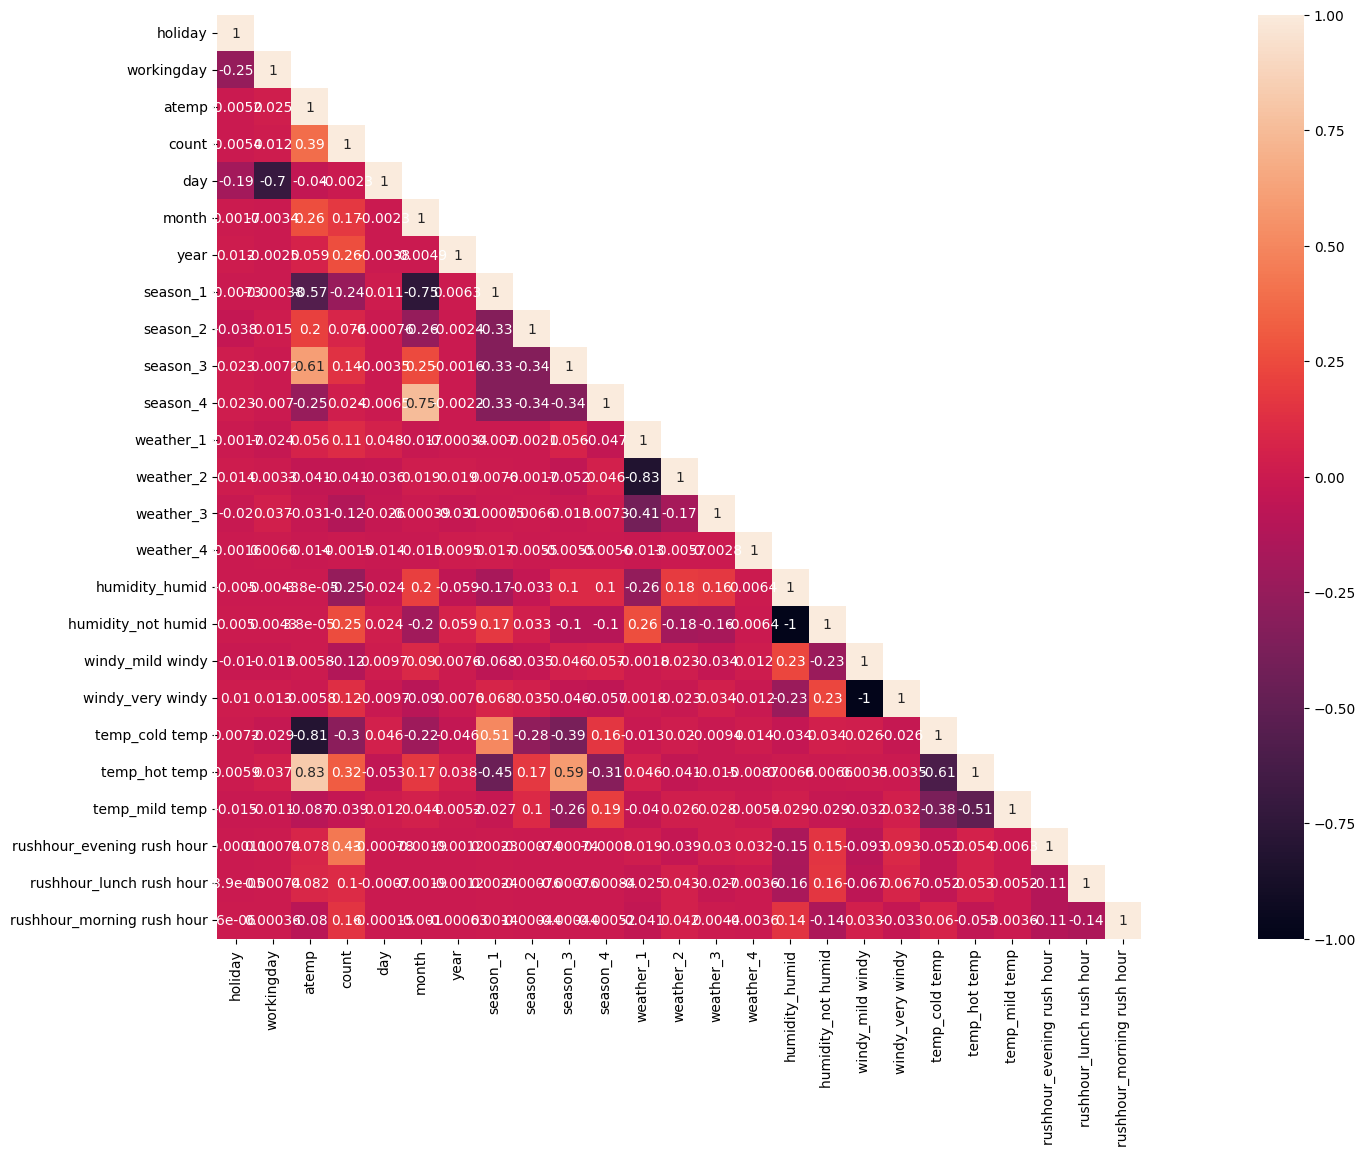

In [187]:
cor_mat= train[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [ ]:
#hpo4   hyperparameter='XGB', hyperparameter_tune_kwargs="auto"
predictor_new_hpo4 = TabularPredictor(label="count",problem_type='regression',eval_metric="root_mean_squared_error").fit(train_data=train,
                                                                      time_limit=600,
                                                                        presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230609_084554/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230609_084554/"
AutoGluon Version:  0.7.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 24
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10727.44 MB
	Train Data (Original)  Memory Usage: 0.72 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			No

In [ ]:
predictor_new_hpo4.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -83.349473       7.052030  555.027021                0.001407           0.485079            3       True         15
1   RandomForestMSE_BAG_L2  -83.910382       5.957613  437.116410                0.726945          50.913106            2       True         13
2          CatBoost_BAG_L2  -84.568191       5.366520  437.916657                0.135853          51.713352            2       True         14
3        LightGBMXT_BAG_L2  -84.632680       5.969632  418.560795                0.738965          32.357491            2       True         11
4          LightGBM_BAG_L2  -84.718789       5.448859  419.557993                0.218192          33.354688            2       True         12
5      WeightedEnsemble_L2  -87.311852       4.581820  375.722810         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -163.57873714386147,
  'KNeighborsDist_BAG_L1': -166.22067041003274,
  'LightGBMXT_BAG_L1': -91.41725367097686,
  'LightGBM_BAG_L1': -9

In [ ]:
# Remember to set all negative values to zero for "Hpo 4"
predictions_new_hpo4 = predictor_new_hpo4.predict(test)

In [ ]:
#Sum of all negative values in "HPO 4"
(predictions_new_hpo4<0).sum()

0

In [ ]:
#Sum of all negative values in "HPO 4"
predictions_new_hpo4[predictions_new_hpo4<0] =0
(predictions_new_hpo4<0).sum()

0

In [ ]:
# Same thing as train and test dataset for "HPO 4"
submission_new_hpo4 = pd.read_csv('sampleSubmission.csv')
submission_new_hpo4.loc[:,'datetime'] = pd.to_datetime(submission_new_hpo4.loc[:,'datetime'])
submission_new_hpo4.head()

<ipython-input-166-e0f18845d4a2>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  submission_new_hpo4.loc[:,'datetime'] = pd.to_datetime(submission_new_hpo4.loc[:,'datetime'])


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions for "HPO 4"
submission_new_hpo4["count"] = predictions_new_hpo4[0]
submission_new_hpo4.to_csv("submission_new_hpo4.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo4.csv -m "new features with hyperparameters 4"

100% 190k/190k [00:03<00:00, 53.7kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo4.csv      2023-06-09 08:56:32  new features with hyperparameters 4  complete  1.67728      1.67728       
submission_new_hpo4.csv      2023-06-09 08:34:10  new features with hyperparameters 4  complete  1.70376      1.70376       
submission_new_hpo4.csv      2023-06-09 08:32:07  new features with hyperparameters 4  complete  1.70376      1.70376       
submission_new_hpo4.csv      2023-06-09 08:16:22  new features with hyperparameters 4  complete  1.70376      1.70376       


## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

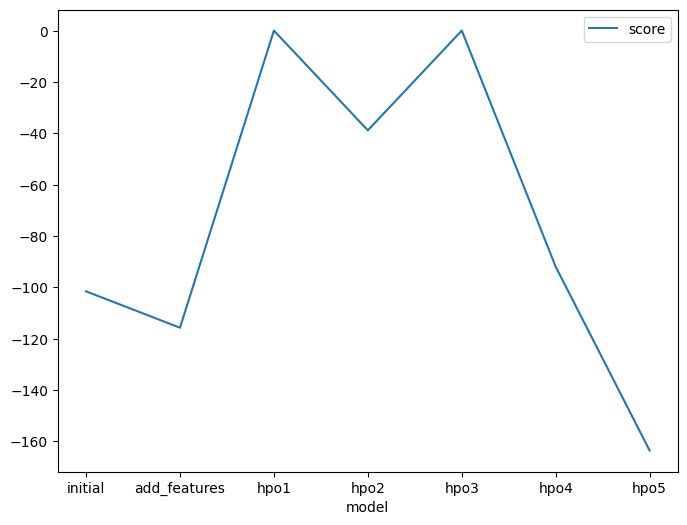

In [188]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo1", "hpo2", "hpo3", "hpo4","hpo5"],
        "score": [-101.54619,-115.7332,0.000224,-38.8463,0.000193,-92.004035,-163.578737]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

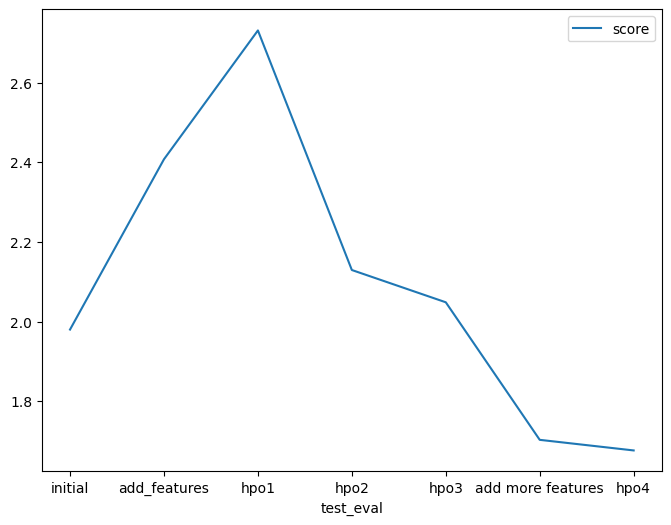

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo1", "hpo2","hpo3","add more features","hpo4"],
        "score": [1.98037, 2.40774, 2.73104, 2.12980, 2.04881,1.7036,1.677]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [184]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo_model_score", "kaggle_score"],
    "hpo1": [-101.54619, -115.7332, 0.000224, 2.73104],
    "hpo2": [-101.54619, -115.7332, -38.8463, 2.12980],
    "hpo3": [-101.54619, -115.7332, 0.000193, 2.04881],
    "add more features": [-101.54619, -115.7332, -92.004035, 1.7036],
    "hpo4":[-101.54619, -115.7332, -163.578737, 1.677]
})

,model,hpo1,hpo2,hpo3,add more features,hpo4
0,initial,-101.546190,-101.54619,-101.546190,-101.546190,-101.546190
1,add_features,-115.733200,-115.73320,-115.733200,-115.733200,-115.733200
2,hpo_model_score,0.000224,-38.84630,0.000193,-92.004035,-163.578737
3,kaggle_score,2.731040,2.12980,2.048810,1.703600,1.677000
